# Data Preprocessing and Descriptive Analytics of KKBox Dataset

*** This is a Kaggle competition and our goal is to accurately predict customer churn***

[WSDM KKBox's Churn Prediction Challenge](https://www.kaggle.com/c/kkbox-churn-prediction-challenge)

## The Business Problem

KKBox is the leader in music streaming in Asia whose business model is based on paid user accounts and advertising revenue. As a result, the client (KKBox) would like a predictive model for customer churn built.

We will present assumptions about the data & model as we preprocess and explore...

In [1]:
# Importing pandas et al is a given for data scientists working with flat files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# As the name implies, this csv holds subscriber information

members = pd.read_csv('members.csv')
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,URiXrfYPzHAlk+7+n7BOMl9G+T7g8JmrSnT/BU8GmEo=,1,0,NaN,9,20150525,20150526
1,U1q0qCqK/lDMTD2kN8G9OXMtfuvLCey20OAIPOvXXGQ=,1,0,NaN,4,20161221,20161224
2,W6M2H2kAoN9ahfDYKo3J6tmsJRAeuFc9wl1cau5VL1Q=,1,0,NaN,4,20160306,20160309
3,1qE5+cN7CUyC+KFH6gBZzMWmM1QpIVW6A43BEm98I/w=,5,17,female,4,20161031,20161107
4,SeAnaZPI+tFdAt+r3lZt/B8PgTp7bcG/1os39u4pLxs=,1,0,NaN,4,20170202,20170205


In [3]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116194 entries, 0 to 5116193
Data columns (total 7 columns):
msno                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
expiration_date           int64
dtypes: int64(5), object(2)
memory usage: 273.2+ MB


In [4]:
members.tail()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
5116189,caZsJUDhjfJZaAJGsGAK/PN+NpG3Dipey6mGOiZ+fmg=,4,17,female,3,20150527,20150603
5116190,F10Hn+qIV08k7nd7i2jdGEEduTMJQjIAgF03dI5t65k=,1,0,NaN,7,20161129,20170930
5116191,nufMrGILJC0l8UwsEegBJeB4Hr6+WJDuWrfLaipSMDA=,15,26,female,9,20130918,20180123
5116192,dw4PyMqv9x+nWlV+D9JWmMlZExnjnkidxBDmUErGsrA=,1,0,NaN,7,20130421,20150407
5116193,VJmQvIH9x9SHfo//AMHJaY1MSQw9FVy4Vhjxxk30pCM=,1,0,NaN,7,20110305,20170908


In [5]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,5.116194e+06,5.116194e+06,5.116194e+06,5.116194e+06,5.116194e+06
mean,4.019725e+00,9.772362e+00,5.248127e+00,2.014631e+07,2.015981e+07
std,5.590289e+00,1.795875e+01,2.260226e+00,2.308540e+04,1.254307e+04
min,1.000000e+00,-6.998000e+03,3.000000e+00,2.004033e+07,1.970010e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014103e+07,2.015111e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015111e+07,2.016070e+07
75%,5.000000e+00,2.100000e+01,7.000000e+00,2.016061e+07,2.017061e+07
max,2.200000e+01,2.015000e+03,1.600000e+01,2.017071e+07,2.100010e+07


In [6]:
members['gender'].dtype

dtype('O')

In [7]:
# Trying to locate missing values in our dataframe...

members.isnull().any()

msno                      False
city                      False
bd                        False
gender                     True
registered_via            False
registration_init_time    False
expiration_date           False
dtype: bool

In [8]:
members['gender'].describe()

count     1761416
unique          2
top          male
freq       902851
Name: gender, dtype: object

In [9]:
# we will replace null values with a new category we will call "missing"

members['gender'] = members['gender'].fillna('missing')

In [10]:
members['gender'].describe()

count     5116194
unique          3
top       missing
freq      3354778
Name: gender, dtype: object

In [11]:
members['gender'].unique()

array(['missing', 'female', 'male'], dtype=object)

In [12]:
# let's find out what unique values our other variables hold...

for column in members:
    print column
    print members[column].unique()

msno
['URiXrfYPzHAlk+7+n7BOMl9G+T7g8JmrSnT/BU8GmEo='
 'U1q0qCqK/lDMTD2kN8G9OXMtfuvLCey20OAIPOvXXGQ='
 'W6M2H2kAoN9ahfDYKo3J6tmsJRAeuFc9wl1cau5VL1Q=' ...,
 'nufMrGILJC0l8UwsEegBJeB4Hr6+WJDuWrfLaipSMDA='
 'dw4PyMqv9x+nWlV+D9JWmMlZExnjnkidxBDmUErGsrA='
 'VJmQvIH9x9SHfo//AMHJaY1MSQw9FVy4Vhjxxk30pCM=']
city
[ 1  5  6 22 13  4 12 15 17 14 11 10  3  9  8 21 18  7 19 20 16]
bd
[    0    17    40    24    56    22    32    19   117    42    25    29
    28    43    41    47    18    20    36    21    50    39    38    26
    27    53    23    16    34    37    48    30    45    52    46    57
    44    33    35    31    58    54    49    55    15    14    79    67
    66    62    51    96    92    61    59    65    81    69    60    63
    64   104   106    97    72    73    84    75   112    94    91    68
   -36    74   102     3    95    12    70   105    76    71   111    80
    78    85  1032    13     2   100     9    90    77     6   103    86
     1     5    87   101   139   -51   107  

**The bd column is a placeholder for subscriber age whose entries range from -6998 to 2015**

*What assumptions can we make about this variable?*

- It is possible this field is stored in a Unix-like database that holds dates as either positive or negative offsets of 1970
- The values could also be user entry errors

As KKBox only accepts registrants from within Asia, we had someone from Hong Kong sign up and we got these screenshots:

<table><tr><td><img src="correct.jpg" style="width: 250px;"></td><td><img src="wrong1.jpg" style="width: 250px;"></td><td><img src="wrong2.jpg" style="width: 250px;"></td></tr></table>

## Clearly, KKbox has data validation issues they need to attend to...

### We will assume any age lower than 0 and higher than 100 is invalid.

In this age where 3-year olds have their own smart devices, we will assume parents can sign their kids (aged  0 - 15) up for the service.

In [45]:
print members['bd'][(members['bd'] > 0) & (members['bd'] < 100)].count()
print len(members['bd'])
(members['bd'][(members['bd'] > 0) & (members['bd'] < 100)].count())*100/len(members['bd'])

1690537
5116194


33

**So 33% of the values under the bd variable were imputed correctly?**

In [17]:
print members['bd'][members['bd'] < 0].count()
float(members['bd'][members['bd'] < 0].count()*100)/len(members['bd'])

178


0.0034791487578461643

** Less than 0.005% of the age variable are negative.**

In [16]:
print members['bd'][members['bd'] > 100].count()
float(members['bd'][members['bd'] > 100].count()*100)/len(members['bd'])

3791


0.07409805023030792

**0.075% of the bd column are above 100.**

In [46]:
# If greater than 100 or negative, we will assign as invalid 

members.loc[members['bd'] < 0, 'bd'] = np.nan
members.loc[members['bd'] > 100, 'bd'] = np.nan

members['bd'].describe()

count    5.112225e+06
mean     9.665540e+00
std      1.500244e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.100000e+01
max      1.000000e+02
Name: bd, dtype: float64

In [54]:
np.sort(members['bd'].unique())

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,   nan])

ValueError: max must be larger than min in range parameter.

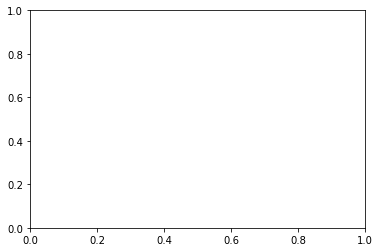

In [60]:
# fig, ax = plt.subplots(figsize=[8,6])
ax.set_title("Distribution of age")
ax.set_ylabel("Frequency")
ax.set_xlabel("Age")
plt.hist(members['bd'])
plt.show()

In [14]:
members.iloc[:, [-1]].head()

,expiration_date
0,20150526
1,20161224
2,20160309
3,20161107
4,20170205


In [15]:
members['expiration_date'].dtype

dtype('int64')

In [16]:
from datetime import datetime

In [17]:
members['expiration_date'] = members['expiration_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d').date())

#The code below didnt work; it seemed to be running in an endless loop for some reason, will investigate if time permits... 
#for index, row in members.iterrows():
#    dat = str(members['expiration_date'][index])
#    members.loc[index, 'expiration_date'] = datetime(year=int(dat[0:4]), month=int(dat[4:6]), day=int(dat[6:8])).date()

In [ ]:
members['expiration_date'].head()

In [ ]:
members['registration_init_time'] = members['registration_init_time'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d').date())

In [ ]:
members['registration_init_time'].describe()

In [ ]:
for column in members:
    print members[column].describe()

** So... We have 6 predictor variables - 3 categorical (registered via, gender, and city), 2 date objects, and age **